<a href="https://colab.research.google.com/github/raju20215/GlassdoorJobposting/blob/main/datavisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
data=pd.read_csv('finaldata.csv')

In [ ]:
data.head(10)

,Job Title,Company Name,Company Ratings,Location,Salary,Salary Est,Description,Apply Type,Skills,jobcard_listing_age,min_salary,max_salary,Avg_salary,Skills_cleaned,Skill_list
0,"Data Analyst, Predictive Analytics, India- X D...",Boston Consulting Group,4.2,Bengaluru,₹7L - ₹9L (Glassdoor Est.),(Glassdoor Est.),Our data analytics and artificial intelligence...,Apply on Company Link,"\n Skills: Microsoft Powerpoint, Statis...",13d,700000.0,900000.0,800000.0,"Microsoft Powerpoint, Statistics, Power BI, Mi...","[Microsoft Powerpoint, Statistics, Power BI, M..."
1,Analyst-Control Mgmt,Amex,4.1,Gurgaon,₹7L - ₹8L (Glassdoor Est.),(Glassdoor Est.),The U.S. Consumer Services Team is responsible...,Apply on Company Link,"\n Skills: Operational risk management,...",6d,700000.0,800000.0,750000.0,"Operational risk management, Research, Adminis...","[Operational risk management, Research, Admini..."
2,Senior Analyst - RCM,Optum,3.5,Hyderābād,₹1L - ₹5L (Glassdoor Est.),(Glassdoor Est.),Comply with the terms and conditions of the em...,Apply on Company Link,"\n Skills: Revenue cycle management, Po...",10d,100000.0,500000.0,300000.0,"Revenue cycle management, Power BI, Microsoft ...","[Revenue cycle management, Power BI, Microsoft..."
3,AP Client Team Senior Analyst,Boston Consulting Group,4.2,Gurgaon,NaN,NaN,Experience working effectively in an internati...,Apply on Company Link,"\n Skills: Microsoft Powerpoint, Micros...",14d,NaN,NaN,NaN,"Microsoft Powerpoint, Microsoft Excel, SAP, Da...","[Microsoft Powerpoint, Microsoft Excel, SAP, D..."
4,Supply Chain Transformation - Performance Analyst,BP Energy,3.9,Pune,₹5L - ₹12L (Glassdoor Est.),(Glassdoor Est.),Individuals with an accessibility need may req...,Apply on Company Link,"\n Skills: Power BI, Waterfall, Kanban,...",30d+,500000.0,1200000.0,850000.0,"Power BI, Waterfall, Kanban, Supply chain, Dat...","[Power BI, Waterfall, Kanban, Supply chain, Da..."
5,Data Analyst Intern,Labmentix,NaN,Remote,NaN,NaN,"As an intern, you will have the opportunity to...",Easy Apply,"\n Skills: Microsoft Excel, Data analys...",26d,NaN,NaN,NaN,"Microsoft Excel, Data analysis skills, SQL, An...","[Microsoft Excel, Data analysis skills, SQL, A..."
6,University Admissions Data Analyst - Remote / ...,Yellow Chapter,NaN,Remote,₹4L - ₹12L (Employer Est.),(Employer Est.),Expertise in data analysis and visualization t...,Easy Apply,"\n Skills: Statistics, Data analysis sk...",30d+,400000.0,1200000.0,800000.0,"Statistics, Data analysis skills, Leadership","[Statistics, Data analysis skills, Leadership]"
7,Data Analyst,Hewlett Packard,4.0,Bengaluru,NaN,NaN,Combine industry experience with an understand...,Apply on Company Link,"\n Skills: CI/CD, Power BI, Microsoft E...",7d,NaN,NaN,NaN,"CI/CD, Power BI, Microsoft Excel, Big data, Mi...","[CI/CD, Power BI, Microsoft Excel, Big data, M..."
8,Remote Data Engineering & Insights Analyst Intern,Minimal Edge Tech,NaN,Remote,₹68T (Employer Est.),(Employer Est.),"In this role, you’ll be instrumental in turnin...",Easy Apply,"\n Skills: Azure, Java, REST, Informati...",12d,816000.0,816000.0,816000.0,"Azure, Java, REST, Informatica, Data warehouse","[Azure, Java, REST, Informatica, Data warehouse]"
9,Data Analyst - GCSS,Whatfix,3.6,Bengaluru,₹5L - ₹9L (Glassdoor Est.),(Glassdoor Est.),"Collect, Organise, and Clean data for further ...",Easy Apply,"\n Skills: Data mining, AWS\n",14d,500000.0,900000.0,700000.0,"Data mining, AWS","[Data mining, AWS]"


In [ ]:
data['Job Title'].nunique()

3127

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14794 entries, 0 to 15481
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Job Title            14794 non-null  object 
 1   Company Name         14794 non-null  object 
 2   Company Ratings      10418 non-null  float64
 3   Location             14793 non-null  object 
 4   Salary               10181 non-null  object 
 5   Salary Est           10181 non-null  object 
 6   Description          14794 non-null  object 
 7   Apply Type           14794 non-null  object 
 8   Skills               14794 non-null  object 
 9   jobcard_listing_age  14794 non-null  object 
 10  min_salary           10159 non-null  float64
 11  max_salary           10159 non-null  float64
 12  Avg_salary           12303 non-null  float64
 13  Skills_cleaned       14794 non-null  object 
 14  Skill_list           14794 non-null  object 
dtypes: float64(4), object(11)
memory usage: 1

In [ ]:
def parse_sal(s):
  if pd.isna(s):
    return pd.Series([np.nan,np.nan])
  m=re.findall(r'₹(\d+)([LT])', s)
  if len(m)==2:
    if m[0][1]=='L':
      return pd.Series([int(m[0][0])*100000,int(m[1][0])*100000])
    elif m[0][1]=='T':
      return pd.Series([int(m[0][0])*1000*12,int(m[1][0])*1000*12])
  elif len(m)==1:
    if m[0][1]=='L':
      return pd.Series([int(m[0][0])*100000,int(m[0][0])*100000])
    elif m[0][1]=='T':
      return pd.Series([int(m[0][0])*1000*12,int(m[0][0])*1000*12])
  return pd.Series([np.nan,np.nan])

In [ ]:
data[['min_salary','max_salary']]=data.Salary.apply(parse_sal)

In [ ]:
data['Avg_salary']=data[['min_salary','max_salary']].mean(axis=1)

In [ ]:
data['Skill_list'][0]

['Microsoft Powerpoint', 'Statistics', 'Power BI', 'Microsoft Access', 'Azure']

In [ ]:
data['Skills_cleaned'] = data['Skills'].str.replace(r'\s*Skills:\s*', '', regex=True).str.strip()

In [ ]:
data['Skill_list'] = data['Skills_cleaned'].str.split(',')

In [ ]:
data['Skill_list'] = data['Skill_list'].apply(
    lambda skills: [s.strip() for s in skills] if isinstance(skills, list) else skills
)


In [ ]:
data.to_csv('finaldata1.csv',index=False)

In [ ]:
df1=data.groupby('Job Title')['Avg_salary'].mean().sort_values(ascending=False)

In [ ]:
df1.dropna(inplace=True)

In [ ]:
df1

,Avg_salary
Job Title,
AI Scientist / Generative Molecular Design Lead,9500000.0
Lead Full Stack Developer,7500000.0
Sr. Product Manager,6500000.0
Staff AI Engineer,6000000.0
Senior Software Engineer - Test Automation,5500000.0
...,...
AI Developer Intern,60000.0
Frontend Intern,60000.0
Generative AI Engineer - Trainee,60000.0


In [ ]:
df2=data.groupby('Company Name')['Avg_salary'].mean().sort_values(ascending=False)
df2.dropna(inplace=True)


In [ ]:
data['Avg_salary']=data.apply(lambda x: df1.get(x['Job Title'],np.nan)  if pd.isna(x['Avg_salary']) else x['Avg_salary'],axis=1)

In [ ]:
data['Avg_salary']=data.apply(lambda x: df2.get(x['Company Name'],np.nan)  if pd.isna(x['Avg_salary']) else x['Avg_salary'],axis=1)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12389 entries, 0 to 15481
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Job Title            12389 non-null  object 
 1   Company Name         12389 non-null  object 
 2   Company Ratings      12389 non-null  float64
 3   Location             12389 non-null  object 
 4   Salary Est           12389 non-null  object 
 5   Description          12389 non-null  object 
 6   Apply Type           12389 non-null  object 
 7   Skills               12389 non-null  object 
 8   jobcard_listing_age  12389 non-null  object 
 9   Avg_salary           12389 non-null  float64
 10  Skills_cleaned       12389 non-null  object 
 11  Skill_list           12389 non-null  object 
dtypes: float64(2), object(10)
memory usage: 1.2+ MB


In [ ]:
data.drop(['min_salary', 'max_salary', 'Salary'], axis=1, inplace=True)


In [ ]:
data['Salary Est'].head(10)

,Salary Est
0,(Glassdoor Est.)
1,(Glassdoor Est.)
2,(Glassdoor Est.)
3,NaN
4,(Glassdoor Est.)
5,NaN
6,(Employer Est.)
7,NaN
8,(Employer Est.)
9,(Glassdoor Est.)


In [ ]:
data['Salary Est'] = data['Salary Est'].replace({
    '(Glassdoor Est.)': 'Glassdoor',
    '(Employer Est.)': 'Employer'
})

In [ ]:
data['Salary Est'] = data['Salary Est'].fillna('NoData')

In [ ]:
df3=data.groupby('Company Name')['Company Ratings'].mean().sort_values(ascending=False)
df3.dropna(inplace=True)

In [ ]:
data['Company Ratings']=data.apply(lambda x: df3.get(x['Company Name'],np.nan)  if pd.isna(x['Company Ratings']) else x['Company Ratings'],axis=1)


In [ ]:
df4=data.groupby('Job Title')['Company Ratings'].mean().sort_values(ascending=False)
df4.dropna(inplace=True)

In [ ]:
data['Company Ratings']=data.apply(lambda x: df4.get(x['Job Title'],np.nan)  if pd.isna(x['Company Ratings']) else x['Company Ratings'],axis=1)


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.to_csv('finaldata2.csv',index=False)

NameError: name 'data' is not defined

In [ ]:
data=pd.read_csv('finaldata2.csv')

In [ ]:
data['Location'].replace('India','Pan India',inplace=True)

<ipython-input-3-f7c7d4c294c5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Location'].replace('India','Pan India',inplace=True)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12389 entries, 0 to 12388
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Job Title            12389 non-null  object 
 1   Company Name         12389 non-null  object 
 2   Company Ratings      12389 non-null  float64
 3   Location             12389 non-null  object 
 4   Salary Est           12389 non-null  object 
 5   Description          12389 non-null  object 
 6   Apply Type           12389 non-null  object 
 7   Skills               12389 non-null  object 
 8   jobcard_listing_age  12389 non-null  object 
 9   Avg_salary           12389 non-null  float64
 10  Skills_cleaned       12389 non-null  object 
 11  Skill_list           12389 non-null  object 
dtypes: float64(2), object(10)
memory usage: 1.1+ MB


In [ ]:
data['Salary Est'] = data['Salary Est'].astype('category')
data['Apply Type'] = data['Apply Type'].astype('category')

<ipython-input-6-7c30c0cc574e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['Job Title'],order=data['Job Title'].value_counts().index[:10],palette='viridis')


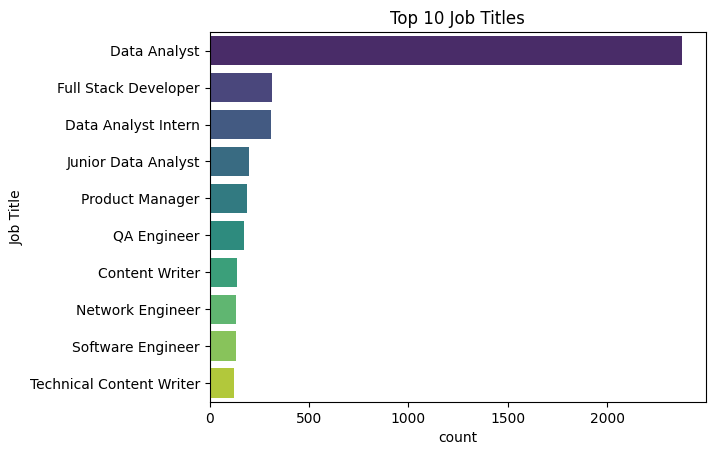

In [ ]:
sns.countplot(data['Job Title'],order=data['Job Title'].value_counts().index[:10],palette='viridis')
plt.title('Top 10 Job Titles')
plt.show()

<ipython-input-7-4a6c10661800>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['Company Name'],order=data['Company Name'].value_counts().index[:10],palette='viridis')


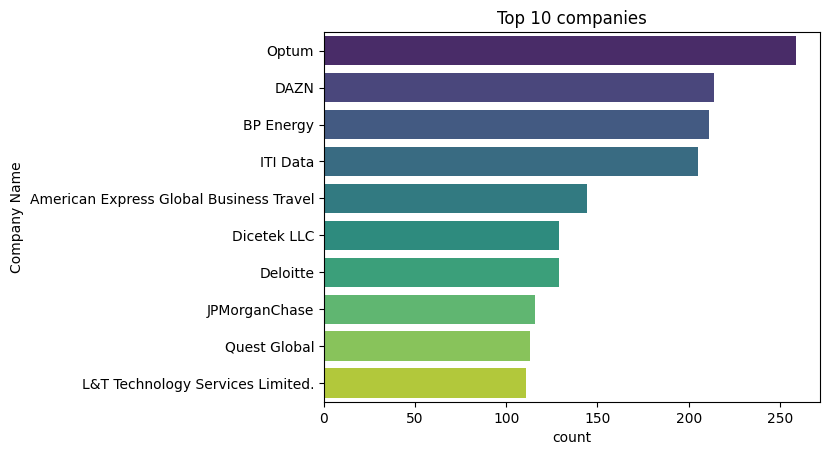

In [ ]:
sns.countplot(data['Company Name'],order=data['Company Name'].value_counts().index[:10],palette='viridis')
plt.title('Top 10 companies')
plt.show()

<ipython-input-8-4b8b395c4839>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['Location'],order=data['Location'].value_counts().index[:10],palette='viridis')


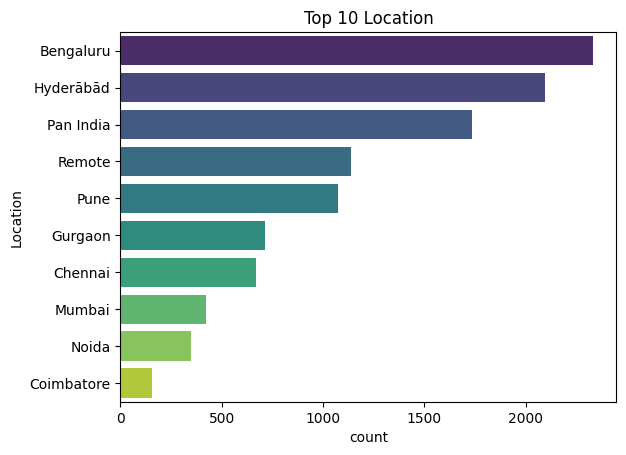

In [ ]:
sns.countplot(data['Location'],order=data['Location'].value_counts().index[:10],palette='viridis')
plt.title('Top 10 Location')
plt.show()

In [ ]:
topl=data['Location'].value_counts().index[:10]
topj=data['Job Title'].value_counts().index[:10]

In [ ]:
subset=data[data['Location'].isin(topl) & data['Job Title'].isin(topj)]

Text(0.5, 1.0, 'Location vs Job Title')

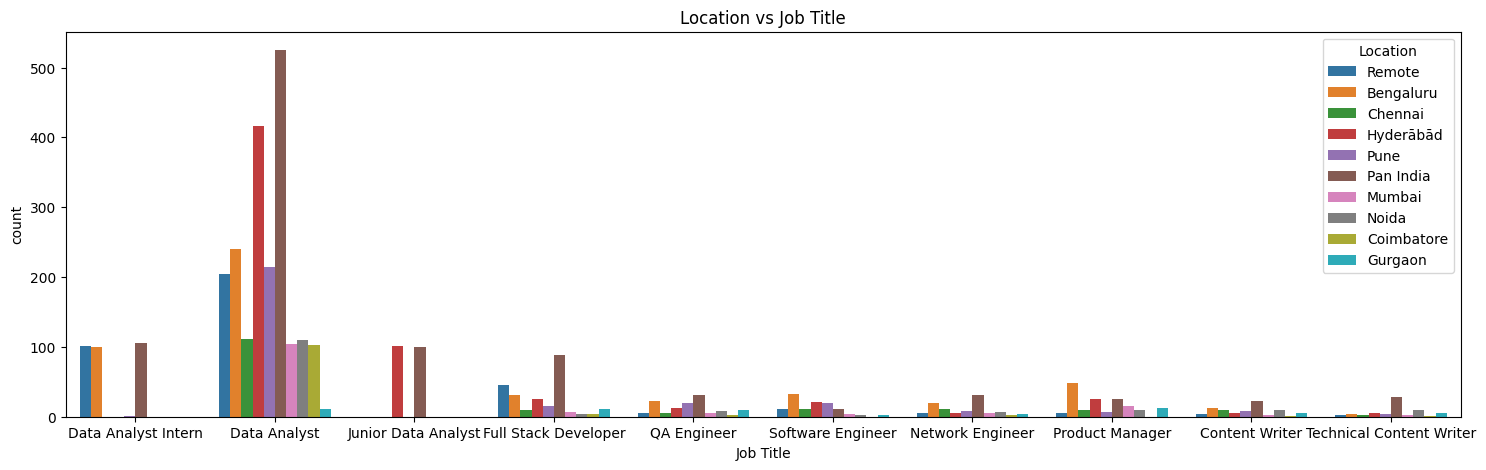

In [ ]:
plt.figure(figsize=(18,5))
sns.countplot(data=subset,x='Job Title',hue='Location')
plt.title('Location vs Job Title')

Text(0.5, 1.0, 'Avg_salary count')

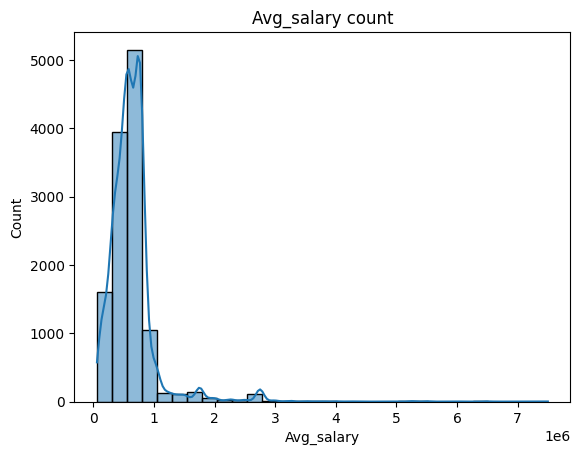

In [ ]:
sns.histplot((data['Avg_salary']),bins=30,kde=True ,)
plt.title('Avg_salary count')

In [ ]:
topj_by_sal=data.groupby('Job Title')['Avg_salary'].mean().sort_values(ascending=False)

Text(0.5, 1.0, 'Top Job Title with Highest Salary')

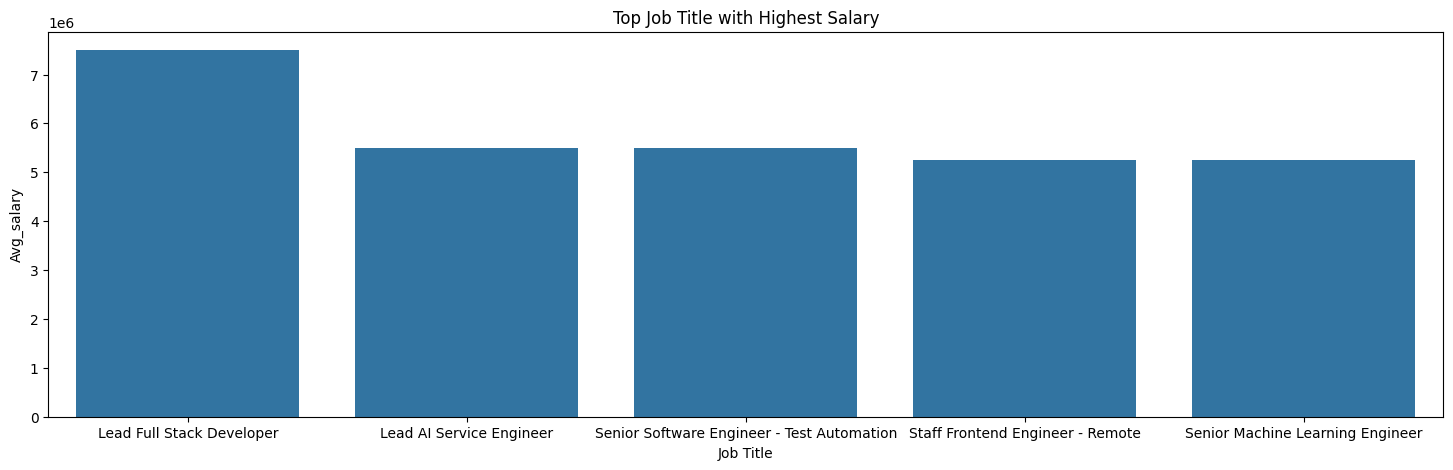

In [ ]:
plt.figure(figsize=(18,5))
sns.barplot(data=topj_by_sal.head(5))
plt.title('Top Job Title with Highest Salary')

<Axes: xlabel='Company Ratings', ylabel='Avg_salary'>

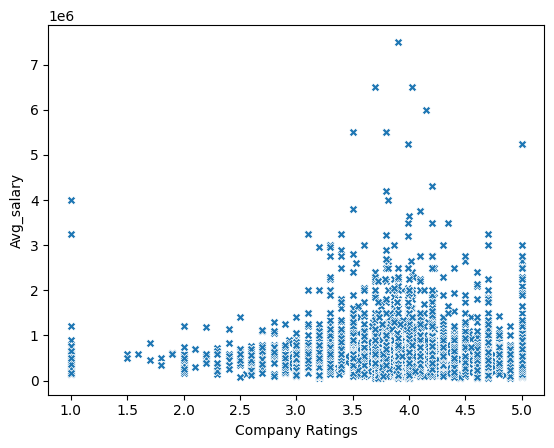

In [ ]:
sns.scatterplot(data=data,x='Company Ratings',y='Avg_salary',marker='X')

<Axes: >

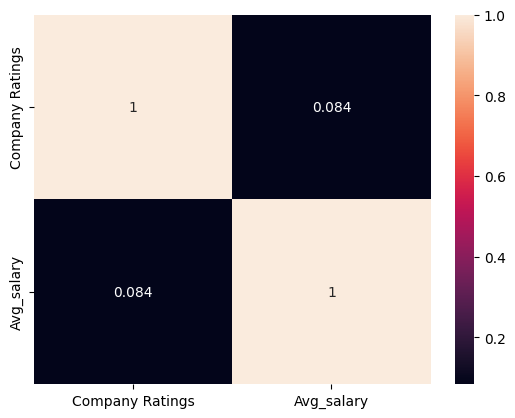

In [ ]:
sns.heatmap(data=data[['Company Ratings','Avg_salary']].corr(),annot=True)

<Axes: xlabel='Company Ratings', ylabel='Count'>

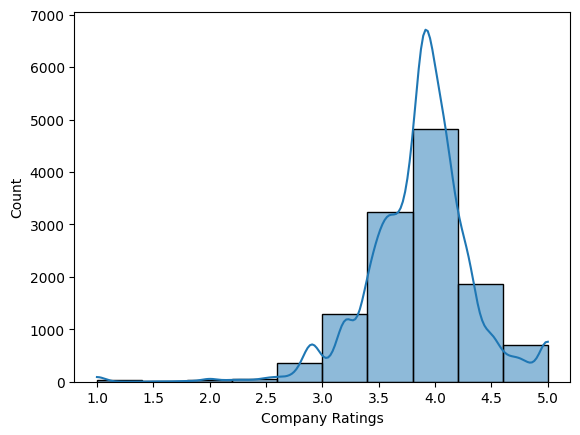

In [ ]:
sns.histplot(data=data,x=data['Company Ratings'],bins=10,kde=True)


In [ ]:
l_avg_sal=data.groupby('Location')['Avg_salary'].mean().sort_values(ascending=False).head(10)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12389 entries, 0 to 12388
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Job Title            12389 non-null  object  
 1   Company Name         12389 non-null  object  
 2   Company Ratings      12389 non-null  float64 
 3   Location             12389 non-null  object  
 4   Salary Est           12389 non-null  category
 5   Description          12389 non-null  object  
 6   Apply Type           12389 non-null  category
 7   Skills               12389 non-null  object  
 8   jobcard_listing_age  12389 non-null  object  
 9   Avg_salary           12389 non-null  float64 
 10  Skills_cleaned       12389 non-null  object  
 11  Skill_list           12389 non-null  object  
dtypes: category(2), float64(2), object(8)
memory usage: 992.5+ KB


In [ ]:
data['Location'].value_counts().index[:10]

Index(['Bengaluru', 'Hyderābād', 'Pan India', 'Remote', 'Pune', 'Gurgaon',
       'Chennai', 'Mumbai', 'Noida', 'Coimbatore'],
      dtype='object', name='Location')

In [ ]:
d10=data[data['Location'].isin(topl)]


<ipython-input-21-d4aa84fad7b5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(d10.groupby('Location')['Avg_salary'].mean().sort_values(ascending=False),palette='viridis')


Text(0.5, 1.0, 'Avg Salary by Top 10 Locations')

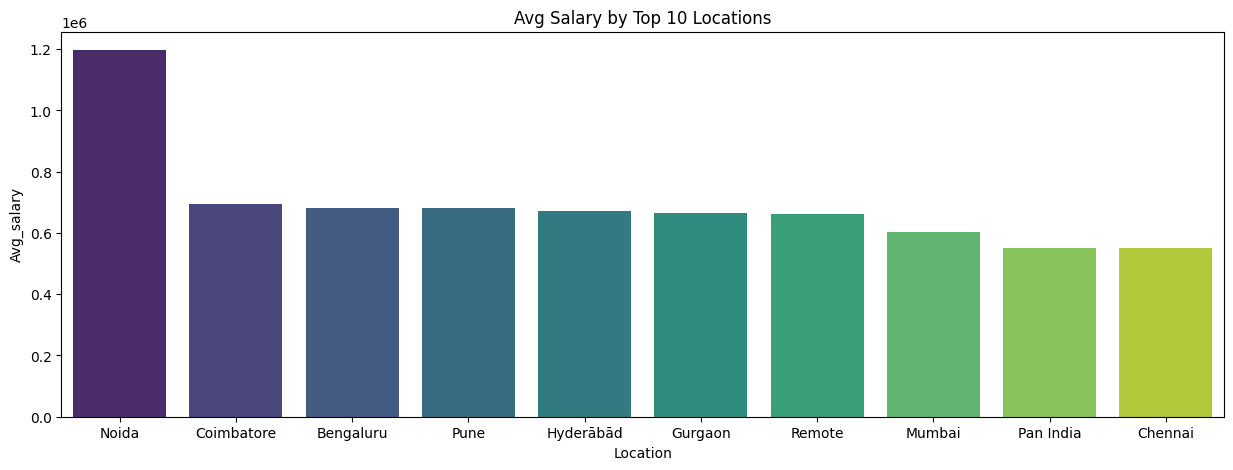

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(d10.groupby('Location')['Avg_salary'].mean().sort_values(ascending=False),palette='viridis')
plt.title('Avg Salary by Top 10 Locations')

In [ ]:
data['newskilllist']=data['Skills_cleaned'].apply(lambda x:x.split(','))

In [ ]:
data['newskilllist']

,newskilllist
0,"[Microsoft Powerpoint, Statistics, Power BI,..."
1,"[Operational risk management, Research, Admi..."
2,"[Revenue cycle management, Power BI, Microso..."
3,"[Microsoft Powerpoint, Microsoft Excel, SAP,..."
4,"[Power BI, Waterfall, Kanban, Supply chain,..."
...,...
12384,"[CSS, Bootstrap, React, SASS, Redux]"
12385,"[Statistics, Quality assurance, Test cases]"
12386,"[Azure, Kubernetes, Ansible, DevOps, Build..."
12387,"[SQL, Analysis skills, Quality assurance, S..."


In [ ]:
from collections import Counter
l=sum(data['newskilllist'],[])

In [ ]:
sl=Counter(l)

In [ ]:
d11=pd.Series(sl)

In [ ]:
d11

,0
Microsoft Powerpoint,358
Statistics,20
Power BI,496
Microsoft Access,18
Azure,979
...,...
Less (style sheet language),1
ARM,1
C,1
FedRAMP,2


<ipython-input-28-c2d1b2bb48e0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=d11.sort_values(ascending=False).head(10),palette='viridis')


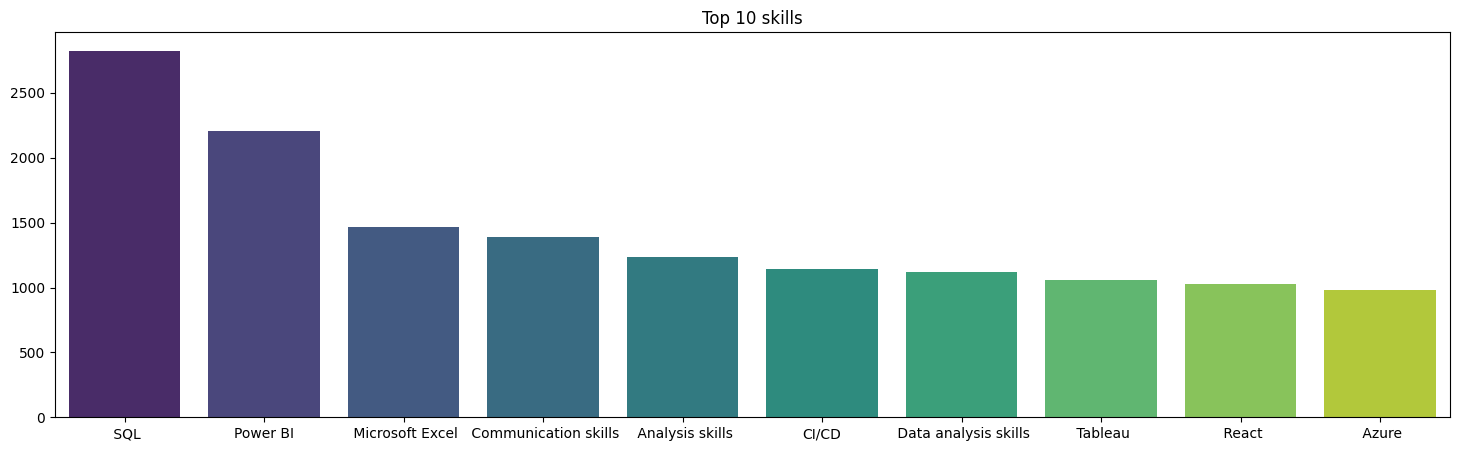

In [ ]:
plt.figure(figsize=(18,5))
sns.barplot(data=d11.sort_values(ascending=False).head(10),palette='viridis')
plt.title('Top 10 skills')
plt.show()

In [ ]:
data['skillcount']=data['newskilllist'].apply(lambda x:len(x))


In [ ]:
topj

Index(['Data Analyst', 'Full Stack Developer', 'Data Analyst Intern',
       'Junior Data Analyst', 'Product Manager', 'QA Engineer',
       'Content Writer', 'Network Engineer', 'Software Engineer',
       'Technical Content Writer'],
      dtype='object', name='Job Title')

In [ ]:
data[data['Job Title'].isin(topj)][['Job Title','skillcount']]

,Job Title,skillcount
5,Data Analyst Intern,5
6,Data Analyst,5
8,Data Analyst,5
9,Junior Data Analyst,3
10,Data Analyst,2
...,...,...
12353,Software Engineer,5
12354,Software Engineer,5
12366,Software Engineer,4
12384,Software Engineer,5


In [ ]:
d12=d11.sort_values(ascending=False).head(10)
d12 = d12.reset_index()
d12.columns = ['skill', 'count']
d12['skill'].tolist()

[' SQL',
 'Power BI',
 ' Microsoft Excel',
 ' Communication skills',
 ' Analysis skills',
 'CI/CD',
 ' Data analysis skills',
 ' Tableau',
 ' React',
 ' Azure']

In [ ]:
data1=data.copy()

In [ ]:

for i in d12['skill']:
  if i not in data.columns:
    data1[i]=data1['newskilllist'].apply(lambda x : i in x)




<ipython-input-35-749a930c73d6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data1.groupby(d12['skill'])['Avg_salary'].mean().sort_values(ascending=False),palette='viridis')


Text(0.5, 1.0, 'top 10 skill by Avg Salary')

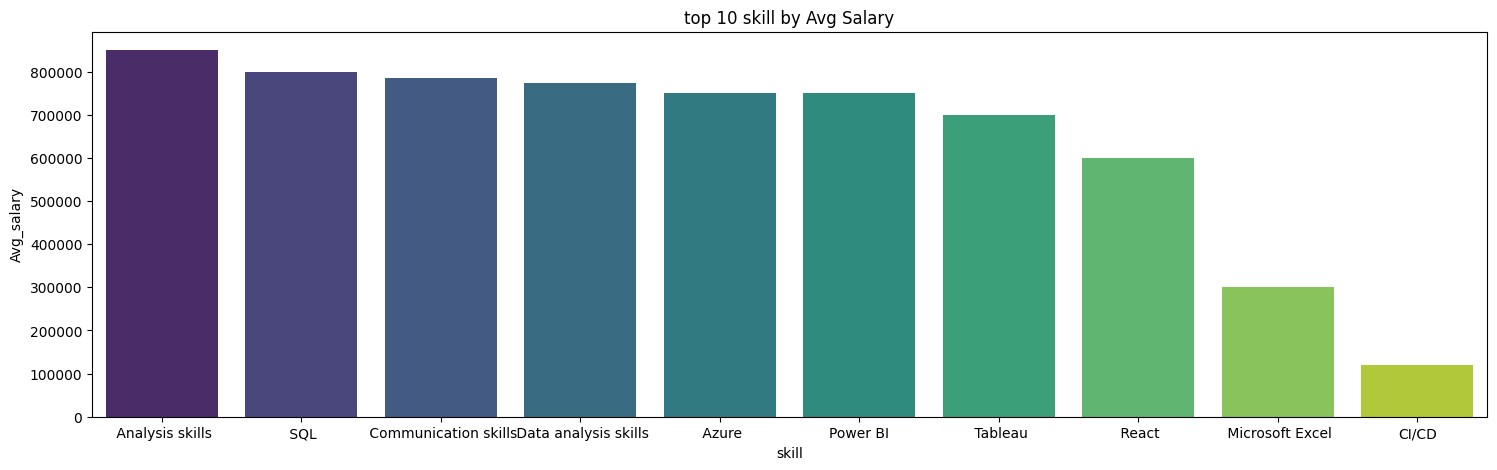

In [ ]:
plt.figure(figsize=(18,5))
sns.barplot(data1.groupby(d12['skill'])['Avg_salary'].mean().sort_values(ascending=False),palette='viridis')
plt.title('top 10 skill by Avg Salary')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12389 entries, 0 to 12388
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Job Title            12389 non-null  object  
 1   Company Name         12389 non-null  object  
 2   Company Ratings      12389 non-null  float64 
 3   Location             12389 non-null  object  
 4   Salary Est           12389 non-null  category
 5   Description          12389 non-null  object  
 6   Apply Type           12389 non-null  category
 7   Skills               12389 non-null  object  
 8   jobcard_listing_age  12389 non-null  object  
 9   Avg_salary           12389 non-null  float64 
 10  Skills_cleaned       12389 non-null  object  
 11  Skill_list           12389 non-null  object  
 12  newskilllist         12389 non-null  object  
 13  skillcount           12389 non-null  int64   
dtypes: category(2), float64(2), int64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
data['jobcard_listing_age']=data['jobcard_listing_age'].str.extract(r'(\d+)').astype(int)

<Axes: xlabel='jobcard_listing_age', ylabel='Count'>

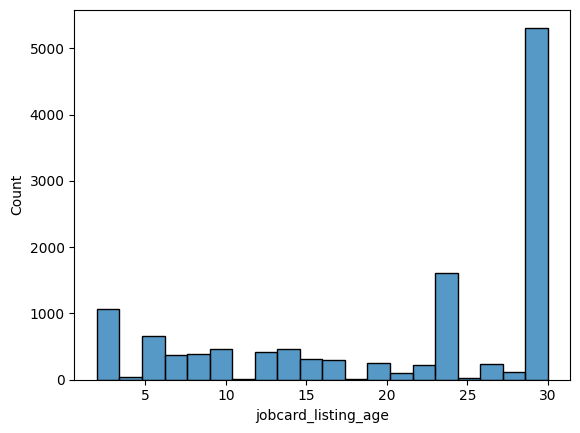

In [ ]:
sns.histplot(data=data,x='jobcard_listing_age')

In [ ]:
today = pd.to_datetime('today').normalize()
data['posted_date'] = today - pd.to_timedelta(data['jobcard_listing_age'], unit='D')
data['posted_date']

,posted_date
0,2025-04-10
1,2025-04-17
2,2025-04-13
3,2025-04-09
4,2025-03-24
...,...
12384,2025-03-24
12385,2025-03-24
12386,2025-03-27
12387,2025-03-24


In [ ]:

trend = data['posted_date'].value_counts().sort_index()
trend_df = trend.reset_index()
trend_df.columns = ['Date', 'Number of Postings']
print(trend_df)


         Date  Number of Postings
0  2025-03-24                4908
1  2025-03-25                 405
2  2025-03-26                 114
3  2025-03-27                  97
4  2025-03-28                 145
5  2025-03-29                  18
6  2025-03-30                1387
7  2025-03-31                 218
8  2025-04-01                 226
9  2025-04-02                 104
10 2025-04-03                 115
11 2025-04-04                 140
12 2025-04-05                  15
13 2025-04-06                  51
14 2025-04-07                 249
15 2025-04-08                 312
16 2025-04-09                 469
17 2025-04-10                 362
18 2025-04-11                  53
19 2025-04-12                  14
20 2025-04-13                 270
21 2025-04-14                 196
22 2025-04-15                 392
23 2025-04-16                 377
24 2025-04-17                 561
25 2025-04-18                  92
26 2025-04-19                  36
27 2025-04-20                 310
28 2025-04-21 

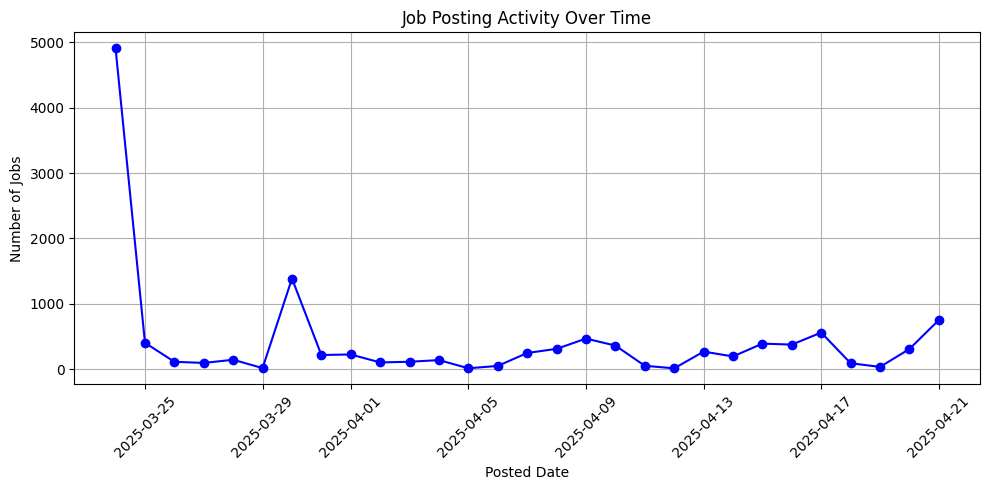

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(trend.index, trend.values, marker='o', linestyle='-', color='blue')
plt.title('Job Posting Activity Over Time')
plt.xlabel('Posted Date')
plt.ylabel('Number of Jobs')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12389 entries, 0 to 12388
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Job Title            12389 non-null  object        
 1   Company Name         12389 non-null  object        
 2   Company Ratings      12389 non-null  float64       
 3   Location             12389 non-null  object        
 4   Salary Est           12389 non-null  category      
 5   Description          12389 non-null  object        
 6   Apply Type           12389 non-null  category      
 7   Skills               12389 non-null  object        
 8   jobcard_listing_age  12389 non-null  int64         
 9   Avg_salary           12389 non-null  float64       
 10  Skills_cleaned       12389 non-null  object        
 11  Skill_list           12389 non-null  object        
 12  newskilllist         12389 non-null  object        
 13  skillcount           12389 non-

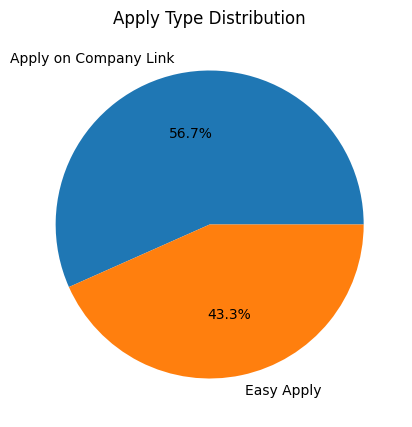

In [ ]:

plt.figure(figsize=(5, 5))
plt.pie(
    data['Apply Type'].value_counts().values,
    labels=data['Apply Type'].value_counts().index,
    autopct='%1.1f%%',
)
plt.title('Apply Type Distribution')
plt.show()

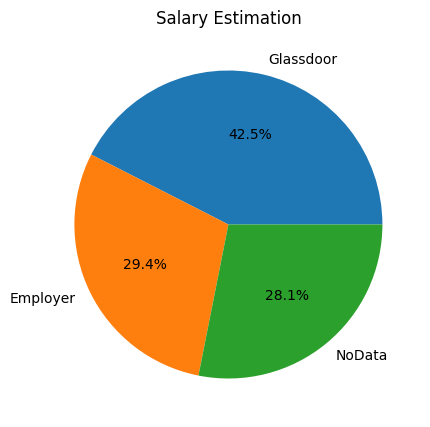

In [ ]:
plt.figure(figsize=(5, 5))
plt.pie(
    data['Salary Est'].value_counts().values,
    labels=data['Salary Est'].value_counts().index,
    autopct='%1.1f%%',
)
plt.title('Salary Estimation')
plt.show()

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12389 entries, 0 to 12388
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Job Title              12389 non-null  object  
 1   Company Name           12389 non-null  object  
 2   Company Ratings        12389 non-null  float64 
 3   Location               12389 non-null  object  
 4   Salary Est             12389 non-null  category
 5   Description            12389 non-null  object  
 6   Apply Type             12389 non-null  category
 7   Skills                 12389 non-null  object  
 8   jobcard_listing_age    12389 non-null  object  
 9   Avg_salary             12389 non-null  float64 
 10  Skills_cleaned         12389 non-null  object  
 11  Skill_list             12389 non-null  object  
 12  newskilllist           12389 non-null  object  
 13  skillcount             12389 non-null  int64   
 14   SQL                   12389 non-null 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12389 entries, 0 to 12388
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Job Title            12389 non-null  object        
 1   Company Name         12389 non-null  object        
 2   Company Ratings      12389 non-null  float64       
 3   Location             12389 non-null  object        
 4   Salary Est           12389 non-null  category      
 5   Description          12389 non-null  object        
 6   Apply Type           12389 non-null  category      
 7   Skills               12389 non-null  object        
 8   jobcard_listing_age  12389 non-null  int64         
 9   Avg_salary           12389 non-null  float64       
 10  Skills_cleaned       12389 non-null  object        
 11  Skill_list           12389 non-null  object        
 12  newskilllist         12389 non-null  object        
 13  skillcount           12389 non-